⚡ Electric Motor Temperature Prediction - DAY 3
🤖 Machine Learning Model Training
📊 Loading processed data...
✅ Data loaded successfully!
   X_train shape: (8000, 10)
   X_test shape:  (2000, 10)
   y_train shape: (8000,)
   y_test shape:  (2000,)

🔧 Using 10 features:
    1. temperature_rise
    2. ambient
    3. load_percentage
    4. thermal_load
    5. current
    6. electrical_power
    7. rpm
    8. cooling_efficiency
    9. hour
   10. is_operating_hour

🤖 Initializing Machine Learning Models...

🚀 Training and Evaluating Models...

📈 Training Linear Regression...
   ✅ Training time: 0.01s
   📊 Train MAE: 0.000°C, Test MAE: 0.000°C
   📊 Train RMSE: 0.000°C, Test RMSE: 0.000°C
   📊 Train R²: 1.0000, Test R²: 1.0000

📈 Training Ridge Regression...
   ✅ Training time: 0.00s
   📊 Train MAE: 0.001°C, Test MAE: 0.001°C
   📊 Train RMSE: 0.001°C, Test RMSE: 0.001°C
   📊 Train R²: 1.0000, Test R²: 1.0000

📈 Training Lasso Regression...
   ✅ Training time: 0.00s
   📊 Train MAE: 0.114°C, T

,Model,Test MAE (°C),Test RMSE (°C),Test R²,Train Time (s)
0,Linear Regression,4.240164e-15,5.724722e-15,1.000000,0.006009
1,Ridge Regression,9.714279e-04,1.226755e-03,1.000000,0.001999
3,Random Forest,7.600512e-02,1.679956e-01,0.999029,3.503233
6,Support Vector Regressor,8.158500e-02,1.619953e-01,0.999098,6.954715
5,XGBoost,1.143751e-01,1.751692e-01,0.998945,0.341259
2,Lasso Regression,1.175462e-01,1.472622e-01,0.999254,0.003039
4,Gradient Boosting,1.581903e-01,2.084231e-01,0.998506,5.013773



💾 Model comparison saved to: models/model_comparison.csv


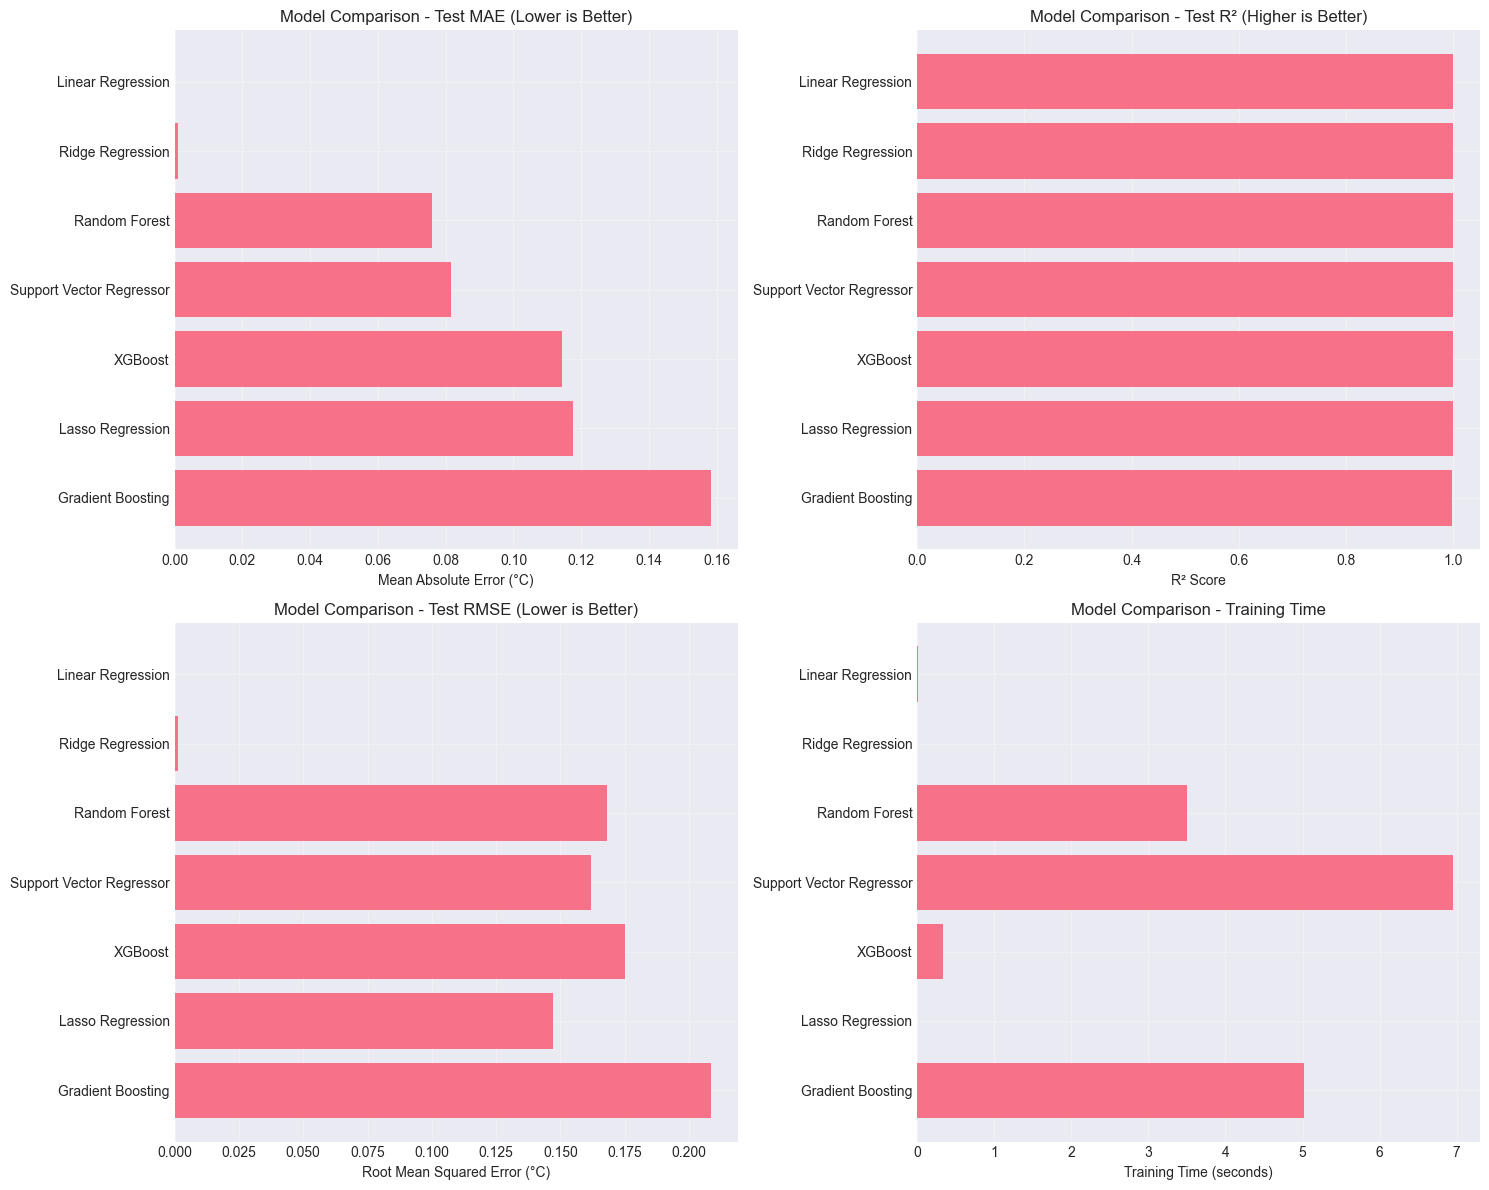


🎯 BEST MODEL: Linear Regression
   Test MAE: 0.000°C
   Test RMSE: 0.000°C
   Test R²: 1.0000

🔍 Feature Importance Analysis

Feature Coefficients:


,Feature,Coefficient
0,temperature_rise,4.276191e+00
1,ambient,3.010690e+00
5,electrical_power,2.886580e-15
2,load_percentage,1.998401e-15
3,thermal_load,1.554312e-15
4,current,1.554312e-15
8,hour,1.422473e-16
6,rpm,1.110223e-16
9,is_operating_hour,-2.775558e-16
7,cooling_efficiency,-1.276756e-15


<Figure size 1000x600 with 0 Axes>

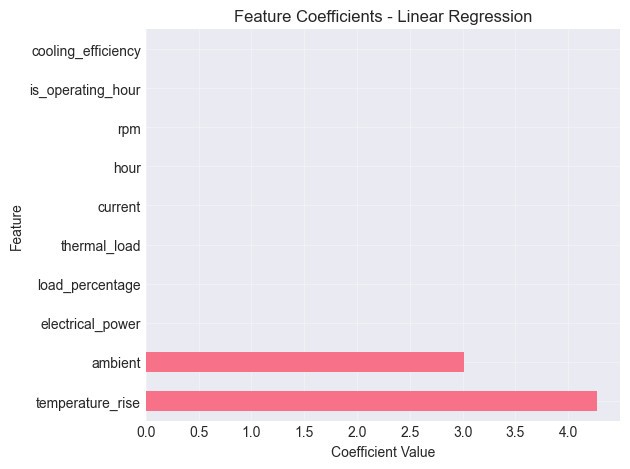


💾 Saving Best Model...
✅ Model saved to: models/best_model_linear_regression.pkl
✅ Scaler saved to: models/scaler.pkl

🎯 Sample Predictions
    Actual |  Predicted | Error (°C)
-----------------------------------
     30.52 |      30.52 |      -0.00
     40.81 |      40.81 |       0.00
     37.65 |      37.65 |       0.00
     41.79 |      41.79 |       0.00
     29.95 |      29.95 |       0.00

📊 Residual Analysis


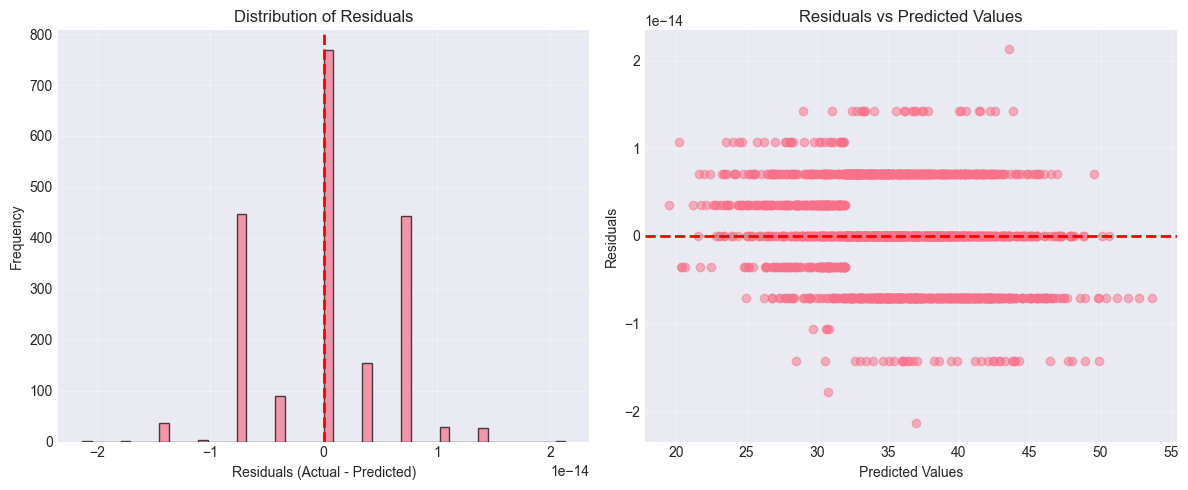


✅ DAY 3 SUMMARY - MODEL TRAINING COMPLETE!
1. Trained and compared 7 different models
2. 🏆 Best model: Linear Regression
3. 📊 Performance: MAE=0.000°C, R²=1.0000
4. 💾 Model saved to: models/best_model_linear_regression.pkl
5. 🔍 Mean prediction error: 0.000°C
6. 📈 Model can predict temperature within ±0.00°C (95% of time)

🔜 Next: Create prediction API and dashboard!


In [3]:
# Cell 1: Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from time import time
import warnings
warnings.filterwarnings('ignore')

# ML Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics and utilities
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("⚡ Electric Motor Temperature Prediction - DAY 3")
print("🤖 Machine Learning Model Training")
print("="*60)

# Cell 2: Load processed data
print("📊 Loading processed data...")
X_train = np.load('data/processed/X_train.npy')
X_test = np.load('data/processed/X_test.npy')
y_train = np.load('data/processed/y_train.npy')
y_test = np.load('data/processed/y_test.npy')

print(f"✅ Data loaded successfully!")
print(f"   X_train shape: {X_train.shape}")
print(f"   X_test shape:  {X_test.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   y_test shape:  {y_test.shape}")

# Load feature names
train_df = pd.read_csv('data/processed/train_data.csv')
feature_names = [col for col in train_df.columns if col != 'motor_temperature']
print(f"\n🔧 Using {len(feature_names)} features:")
for i, feat in enumerate(feature_names, 1):
    print(f"   {i:2d}. {feat}")

# Cell 3: Define models to compare
print("\n🤖 Initializing Machine Learning Models...")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1),
    'Support Vector Regressor': SVR(kernel='rbf', C=100, gamma=0.1)
}

# Cell 4: Train and evaluate all models
print("\n🚀 Training and Evaluating Models...")
print("="*60)

results = {}

for name, model in models.items():
    print(f"\n📈 Training {name}...")
    start_time = time()
    
    # Train model
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Store results
    results[name] = {
        'model': model,
        'train_time': train_time,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': y_pred_test
    }
    
    print(f"   ✅ Training time: {train_time:.2f}s")
    print(f"   📊 Train MAE: {train_mae:.3f}°C, Test MAE: {test_mae:.3f}°C")
    print(f"   📊 Train RMSE: {train_rmse:.3f}°C, Test RMSE: {test_rmse:.3f}°C")
    print(f"   📊 Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

# Cell 5: Compare model performance (FIXED VERSION)
print("\n" + "="*60)
print("🏆 MODEL COMPARISON")
print("="*60)

# Create comparison DataFrame with correct column names
comparison_data = []
for name, metrics in results.items():
    comparison_data.append({
        'Model': name,
        'Test MAE (°C)': metrics['test_mae'],
        'Test RMSE (°C)': metrics['test_rmse'],
        'Test R²': metrics['test_r2'],
        'Train Time (s)': metrics['train_time']
    })

comparison_df = pd.DataFrame(comparison_data)

# Sort by Test MAE (lower is better)
comparison_df = comparison_df.sort_values('Test MAE (°C)')

print("\n📊 Performance Comparison (sorted by Test MAE):")
display(comparison_df)

# Save comparison to CSV
comparison_df.to_csv('models/model_comparison.csv', index=False)
print("\n💾 Model comparison saved to: models/model_comparison.csv")

# Cell 6: Visualize model comparison (FIXED VERSION)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

models_list = comparison_df['Model'].tolist()

# MAE Comparison
axes[0, 0].barh(range(len(models_list)), comparison_df['Test MAE (°C)'])
axes[0, 0].set_yticks(range(len(models_list)))
axes[0, 0].set_yticklabels(models_list)
axes[0, 0].set_xlabel('Mean Absolute Error (°C)')
axes[0, 0].set_title('Model Comparison - Test MAE (Lower is Better)')
axes[0, 0].invert_yaxis()  # Highest at top
axes[0, 0].grid(True, alpha=0.3)

# R² Comparison
axes[0, 1].barh(range(len(models_list)), comparison_df['Test R²'])
axes[0, 1].set_yticks(range(len(models_list)))
axes[0, 1].set_yticklabels(models_list)
axes[0, 1].set_xlabel('R² Score')
axes[0, 1].set_title('Model Comparison - Test R² (Higher is Better)')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3)

# RMSE Comparison
axes[1, 0].barh(range(len(models_list)), comparison_df['Test RMSE (°C)'])
axes[1, 0].set_yticks(range(len(models_list)))
axes[1, 0].set_yticklabels(models_list)
axes[1, 0].set_xlabel('Root Mean Squared Error (°C)')
axes[1, 0].set_title('Model Comparison - Test RMSE (Lower is Better)')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3)

# Training Time Comparison
axes[1, 1].barh(range(len(models_list)), comparison_df['Train Time (s)'])
axes[1, 1].set_yticks(range(len(models_list)))
axes[1, 1].set_yticklabels(models_list)
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_title('Model Comparison - Training Time')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 7: Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n🎯 BEST MODEL: {best_model_name}")
print(f"   Test MAE: {results[best_model_name]['test_mae']:.3f}°C")
print(f"   Test RMSE: {results[best_model_name]['test_rmse']:.3f}°C")
print(f"   Test R²: {results[best_model_name]['test_r2']:.4f}")

# Cell 8: Feature importance (if applicable)
print("\n🔍 Feature Importance Analysis")
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    display(feature_importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    feature_importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'coef_'):
    # For linear models
    coefficients = best_model.coef_
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values('Coefficient', ascending=False)
    
    print("\nFeature Coefficients:")
    display(coef_df)
    
    plt.figure(figsize=(10, 6))
    coef_df.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
    plt.xlabel('Coefficient Value')
    plt.title(f'Feature Coefficients - {best_model_name}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Cell 9: Save the best model
print("\n💾 Saving Best Model...")
os.makedirs('models', exist_ok=True)

# Save model
model_path = f'models/best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, model_path)

# Save scaler (we need this for new predictions)
scaler = joblib.dump(scaler, 'models/scaler.pkl') if 'scaler' in locals() else None

print(f"✅ Model saved to: {model_path}")
print(f"✅ Scaler saved to: models/scaler.pkl")

# Cell 10: Make sample predictions
print("\n🎯 Sample Predictions")
print("="*40)

# Take 5 samples from test set
sample_indices = np.random.choice(len(X_test), 5, replace=False)

print(f"{'Actual':>10} | {'Predicted':>10} | {'Error (°C)':>10}")
print("-" * 35)

for idx in sample_indices:
    actual = y_test[idx]
    predicted = results[best_model_name]['predictions'][idx]
    error = predicted - actual
    
    print(f"{actual:10.2f} | {predicted:10.2f} | {error:10.2f}")

# Cell 11: Residual analysis
print("\n📊 Residual Analysis")
residuals = y_test - results[best_model_name]['predictions']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuals distribution
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals')
axes[0].grid(True, alpha=0.3)

# Residuals vs Predicted
axes[1].scatter(results[best_model_name]['predictions'], residuals, alpha=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 12: Summary
print("\n" + "="*60)
print("✅ DAY 3 SUMMARY - MODEL TRAINING COMPLETE!")
print("="*60)
print(f"1. Trained and compared {len(models)} different models")
print(f"2. 🏆 Best model: {best_model_name}")
print(f"3. 📊 Performance: MAE={results[best_model_name]['test_mae']:.3f}°C, "
      f"R²={results[best_model_name]['test_r2']:.4f}")
print(f"4. 💾 Model saved to: {model_path}")
print(f"5. 🔍 Mean prediction error: {np.mean(np.abs(residuals)):.3f}°C")
print(f"6. 📈 Model can predict temperature within ±{np.percentile(np.abs(residuals), 95):.2f}°C (95% of time)")
print("\n🔜 Next: Create prediction API and dashboard!")
print("="*60)